In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

#Initializing the given parameters
herd_size=12
gamma=0.3
theta=0.5
actions=[]
Totalstates=[]
payoff=np.array([2,6,4])
util_vec=np.array([0.3,0.4,0.2])
transprob=[[0.9,0.1,0],[0,0.75,0.25],[0,0.15,0.85]]
breedprob=[[1.0,0.0,0.0],[0.05,0.8,0.15],[1.0,0.0,0.0]]


In [2]:
#Getting all the states
for i in range(herd_size+1):
    for j in range(herd_size+1):
        for k in range(herd_size+1):
            if(i+j+k<=herd_size):
                Totalstates.append([i,j,k])


In [3]:
#initialization of the policies
al_st_len=len(Totalstates)
values=[0 for i in range(al_st_len)]
new_values=[0 for i in range(al_st_len)]
Old_Policy=[[0,0,0] for i in range(al_st_len)]
Old_Policy[0:100]=[[1,0,0] for i in range(100)]
Old_Policy[101:201]=[[0,1,2] for i in range(101,201)]
New_Policy=[[0,0,0] for i in range(al_st_len)]

In [4]:
#calculationg ncr
C=[[0 for i in range(herd_size+1)] for j in range(herd_size+1)]
for i in range(herd_size+1):
    for j in range(i+1):
        if(j==0 or j==i):
            C[i][j]=1
        else:
            C[i][j]=factorial(i)/(factorial(j)*factorial(i-j))

In [5]:
def Act(state,policy):
    state_actions=[]
    temp=[]
    for f in range(al_st_len):
        if(Totalstates[f]==state):
            state_actions.append(policy[f])
    return state_actions

In [6]:
#Calculationg the possibilities of actions
def possibilities(state):
	state_actions=[]
	for i in range(0,state[0]+1):
		for j in range(0,state[1]+1):
			for k in range(0,state[2]+1):
				state_actions.append([i,j,k])
	return state_actions
#print(actions)

In [7]:
#Calculating the reward for a next state for breeeding
def function2(state):
	mx=herd_size-state[0]-state[1]-state[2]
	r=0
	for i in range(state[1]+1):
		for j in range(state[1]-i+1):
			k=state[1]-i-j
			num=j+2*i
			if(num>mx):
				break
			astate=[state[0]+num,state[1],state[2]]
			index=Totalstates.index(astate)
			r=r+(values[index]*(breedprob[1][0]**k)*(breedprob[1][1]**j)*(breedprob[1][2]**i)*C[state[1]][i]*C[state[1]-i][j])
	return r

In [8]:
#Maximum reward of the state
def function1(state):
	tempstate=[0,0,0]
	r=0
	for i in range(state[0]+1):
		for j in range(state[1]+1):
			for k in range(state[2]+1):
				tempstate=[state[0]-i,state[1]-j+i+k,state[2]-k+j]
				r=r+(C[state[0]][i]*C[state[1]][j]*C[state[2]][k]*(transprob[0][1]**i)*(transprob[1][2]**j)*(transprob[2][1]**k)*(transprob[0][0]**(state[0]-i))*(transprob[1][1]**(state[1]-j))*(transprob[2][2]**(state[2]-k))*(function2(tempstate)))
	return r

In [9]:
ImpIterator=0
EvalIterator=0
#Policy improvement
while(True):
    ImpIterator=ImpIterator+1
    print("Outer Iteration :- ",ImpIterator,",",end="")
    EvalIterator=0
    values=[0 for i in range(al_st_len)]
    new_values=[0 for i in range(al_st_len)]
    prwd=[]
    mx1=0
    reward1=0
    # Policy evaluation
    while(True):
        EvalIterator=EvalIterator+1
        print("Inner Iteration :- ",EvalIterator,",",end="")
        possible_actions=[]
        reward=0
        rwd=[]
        error=0
        u=0
        mx=0
        delta=0
        for i in Totalstates:
            rwd=[]
            mx=0
            possible_actions=Act(i,Old_Policy)
            for j in possible_actions:
                currentreward=sum(np.add(np.multiply(np.subtract(np.array(i),np.array(j)),util_vec),np.multiply(np.array(j),payoff)))
                terminalpayoff=function1([i[0]-j[0],i[1]-j[1],i[2]-j[2]])
                reward=currentreward+(gamma*terminalpayoff)
                rwd.append(reward)
            mx=max(rwd)

            new_values[Totalstates.index(i)]=mx
            delta = max(delta, np.abs(values[Totalstates.index(i)]-mx))

        if(EvalIterator==1):
            sweep1=np.copy(np.array(new_values))
        if(EvalIterator==3):
            sweep10=np.copy(np.array(new_values))
        print("Delta is",delta)
        for u in range(len(new_values)):
            values[u]=new_values[u]
            new_values[u]=0
        if(delta<theta):
            break

    pactions=[]
    for i in Totalstates:
        prwd=[]
        mx1=0
        pactions=possibilities(i)
        for j in pactions:
            currentreward=sum(np.add(np.multiply(np.subtract(np.array(i),np.array(j)),util_vec),np.multiply(np.array(j),payoff)))
            terminalpayoff=function1([i[0]-j[0],i[1]-j[1],i[2]-j[2]])
            reward1=currentreward+(gamma*terminalpayoff)
            prwd.append(reward1)

        new_values[Totalstates.index(i)]=max(prwd)
        New_Policy[Totalstates.index(i)]=pactions[prwd.index(max(prwd))]
    #Stoping criteria
    if(Old_Policy==New_Policy):
        print("-------------------")
        print(Old_Policy[0:15])
        print("****")
        print(New_Policy[0:15])
        break

    for s in range(al_st_len):
        Old_Policy[s]=New_Policy[s]
    if(ImpIterator==1):
        print("yes")
        sweep_p1=np.copy(np.array(Old_Policy))
    if(ImpIterator==2):
        print("yes")
        sweep_p4=np.copy(np.array(Old_Policy))


Outer Iteration :-  1 ,Inner Iteration :-  1 ,Delta is 17.9
Inner Iteration :-  2 ,Delta is 4.048398749999999
Inner Iteration :-  3 ,Delta is 0.7316335589339147
Inner Iteration :-  4 ,Delta is 0.08335231897503981
yes
Outer Iteration :-  2 ,Inner Iteration :-  1 ,Delta is 72.0
Inner Iteration :-  2 ,Delta is 0.5620215000000002
Inner Iteration :-  3 ,Delta is 0.16694989162875018
yes
Outer Iteration :-  3 ,Inner Iteration :-  1 ,Delta is 72.0
Inner Iteration :-  2 ,Delta is 0
-------------------
[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7], [0, 0, 8], [0, 0, 9], [0, 0, 10], [0, 0, 11], [0, 0, 12], [0, 1, 0], [0, 1, 1]]
****
[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 0, 6], [0, 0, 7], [0, 0, 8], [0, 0, 9], [0, 0, 10], [0, 0, 11], [0, 0, 12], [0, 1, 0], [0, 1, 1]]


In [10]:
print(max(values))

72.0


In [11]:
#Converting to required format for plotting
xaxis=np.array([169*i[0]+13*i[1]+1*i[2] for i in Totalstates])

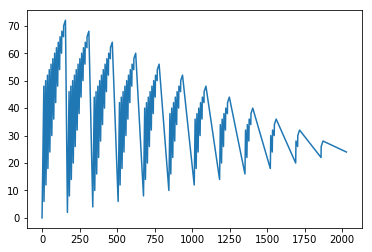

In [12]:
#Plotting for values at 1
plt.plot(xaxis,sweep1)
plt.show()

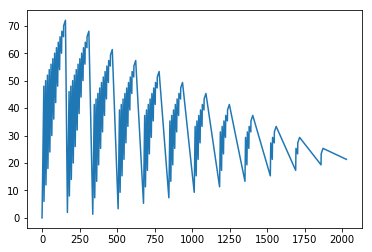

In [13]:
#Plotting for values at 10
plt.plot(xaxis,sweep10)
plt.show()

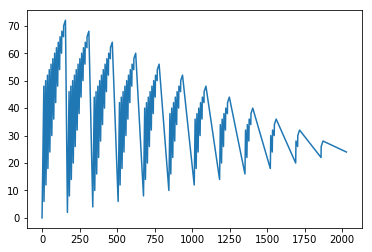

In [14]:
#Plotting for all values
plt.plot(xaxis,values)
plt.show()

In [15]:
xaxis[np.argmax(sweep10)]

156

In [16]:
sweep_p1=np.array([169*i[0]+13*i[1]+1*i[2] for i in sweep_p1])
sweep_p4=np.array([169*i[0]+13*i[1]+1*i[2] for i in sweep_p4])
Old_Policy=np.array([169*i[0]+13*i[1]+1*i[2] for i in Old_Policy])

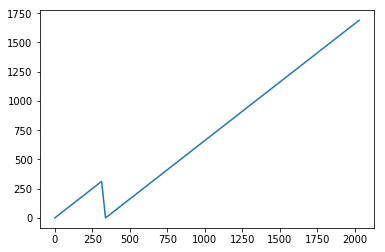

In [17]:
#Plotting for the policy at 1
plt.plot(xaxis,sweep_p1)
plt.show()

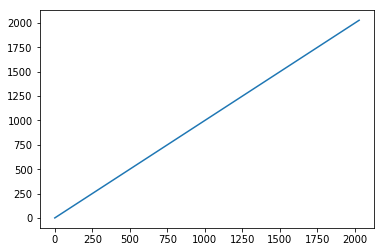

In [18]:
#Plotting for the policy at 2
plt.plot(xaxis,sweep_p4)
plt.show()

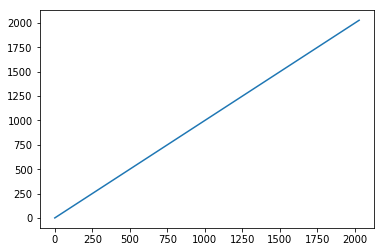

In [19]:
#Plotting for the whole policy
plt.plot(xaxis,Old_Policy)
plt.show()

In [20]:
#(4,7,1) new state
input_state=[4,7,1]
print(New_Policy[Totalstates.index(input_state)])

[4, 7, 1]


In [21]:
#(1,3,6) new state
input_state=[1,3,6]
print(New_Policy[Totalstates.index(input_state)])

[1, 3, 6]


In [22]:
#(9,2,1) new state
input_state=[9,2,1]
print(New_Policy[Totalstates.index(input_state)])

[9, 2, 1]
